Öğrenci ad soyad:  Özge Yıldız (Grup 10)
Numara:		       20194753525 (YBS 2.sınıf 2. Öğretim)

Bana verilen veri seti hastalık sonucu 5 yıl içinde ölenler ve daha fazla süre yaşayan hastaların verileriydi, 1 ölenleri 2 ise yaşayanları temsil ediyor. Ödeve ilk önce verileri anlamakla başlayalım;

In [1]:
##İlk önce veri setimizi okutalım;
import pandas as pd
from pandas import read_csv
filename='grup10.data'
names=['operasyon_yasi','operasyon_yili','pozitif_aksil_sayisi','besyil_icinde_oldumu']## burda sütunları isimlendirdim
data= read_csv(filename, names=names)

In [2]:
data.head(10) ##varsayılan ayarı ilk 5 satırı gösterir.. 

,operasyon_yasi,operasyon_yili,pozitif_aksil_sayisi,besyil_icinde_oldumu
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [3]:
data.shape ## matrisin boyutlarını gösterir. 306 satır ve 4 sütunluk bir datamız var.

(306, 4)

In [4]:
data.describe() ## verinin tanımlayıcı özelliklerini çağırır. 
## örneğin burdan anladığımız operasyonda ortalama hasta yaşı 52, ortalama aksil sayısı 4...

,operasyon_yasi,operasyon_yili,pozitif_aksil_sayisi,besyil_icinde_oldumu
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [5]:
types=data.dtypes  ##veri tiplerini gösterir, hepsi integer tipindeymiş.
print(types)

operasyon_yasi          int64
operasyon_yili          int64
pozitif_aksil_sayisi    int64
besyil_icinde_oldumu    int64
dtype: object


In [6]:
data.isnull().sum() ## kayıp data varmı ona bakıyoruz. Varsa toplamını alacaktı ama eksik verimiz yok.

operasyon_yasi          0
operasyon_yili          0
pozitif_aksil_sayisi    0
besyil_icinde_oldumu    0
dtype: int64

In [7]:
class_counts=data.groupby('besyil_icinde_oldumu').size()
print(class_counts)
## burda sınıf dağılımlarına baktık. 5 yıl içinde ölenlerin sayısı 81, daha uzun yaşanların sayısı ise 225tir.

besyil_icinde_oldumu
1    225
2     81
dtype: int64


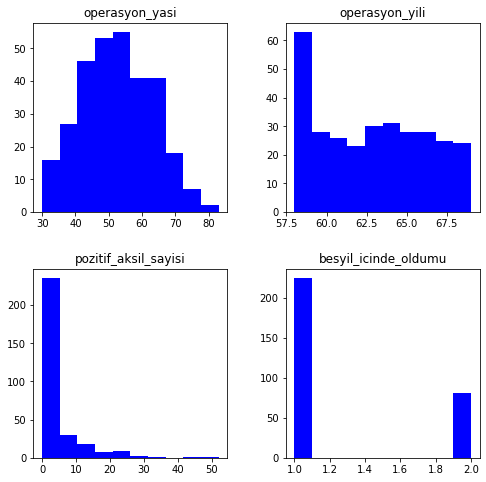

In [8]:
import matplotlib.pyplot as plt
data.hist(figsize=(8,8),grid=False, color='blue')
plt.show()
##figsize grafik boyutunu ayarlamak için kullanılır. aşağıda verilerimize ait histogram grafiklerini görüyoruz.

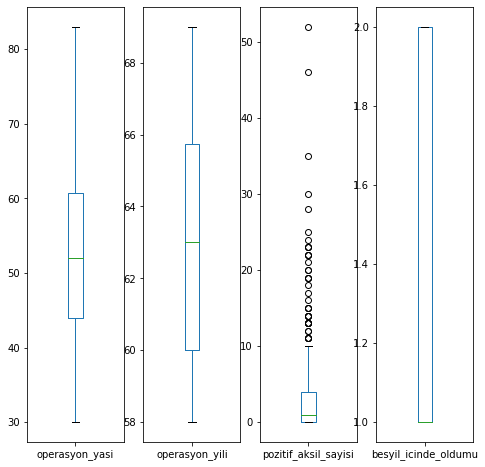

In [9]:
data.plot(kind='box', subplots=True,figsize=(8,8),sharex=False,sharey=False)
plt.show()
## box plot ile datamızda uç nokta olup olmadıgına baktık...

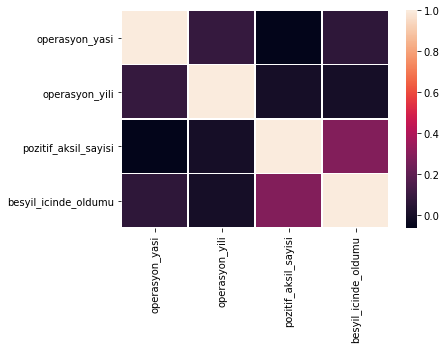

In [10]:
import seaborn as sn
j=data.corr() ## burda kolerasyon matrisini oluşturduk.
sn.heatmap(j,linewidths=.5) ## aradaki boşlukları ayarladık.
plt.show() 

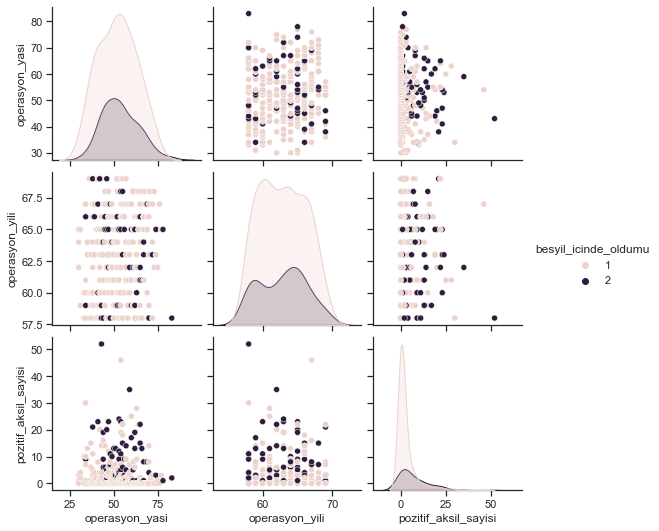

In [11]:
sn.set(style="ticks")
sn.pairplot(data,hue="besyil_icinde_oldumu")
plt.show()
##tüm değerler için scatter natrix oluşturduk...

In [12]:
## datayı parçalayalım yani verilerimizi girdi ve çıktı olarak ayıralım, x girdileri y ise çıktıları temsil eder;
veri=data.values
x=veri[: , 0:3] 
y=veri[:,3]

In [13]:
## datamızı %30 u test olmak üzere eğitim ve test olarak ikiye ayıralım...
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3, random_state=0, stratify=y)

## 1)K-Nearest Neighbors

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
## çıktı tahminlerini oluşturuyoruz;
knn= KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred= knn.predict(x_test)
y_pred1= knn.predict(x_train)

In [16]:
from sklearn.metrics import accuracy_score
print('eğitim doğruluk oranı:', accuracy_score(y_pred1,y_train))
print('\n')
print('test doğruluk oranı:', accuracy_score(y_pred, y_test))
### varsayılan değerlerle çalıştırdığımızda doğruluk oranları aşağıdaki gibidir;

eğitim doğruluk oranı: 0.7616822429906542


test doğruluk oranı: 0.7282608695652174


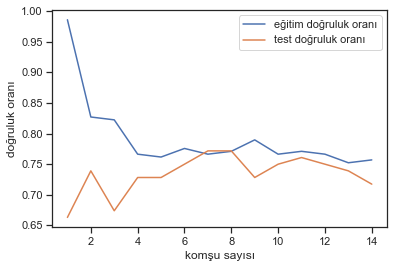

In [17]:
## modelimizde komşu sayısı kaç olmalı? Komşu sayısını 1-15 arası belirledik(15 dahil değil)
import matplotlib.pyplot as plt
egitim_accuracy=[]
test_accuracy=[]
komsu_sayisi= range(1,15)
for a in komsu_sayisi:
    clf=KNeighborsClassifier(n_neighbors= a)
    clf.fit(x_train, y_train)
    egitim_accuracy.append((clf.score(x_train,y_train)))
    test_accuracy.append((clf.score(x_test,y_test)))
plt.plot(komsu_sayisi, egitim_accuracy, label="eğitim doğruluk oranı")
plt.plot(komsu_sayisi, test_accuracy, label="test doğruluk oranı")
plt.ylabel("doğruluk oranı")
plt.xlabel("komşu sayısı")
plt.legend()
### aşadğıdaki tabloda görüldüğü üzere modelin en iyi değeri verdiği komşu sayısı 7-8 dir.

In [18]:
knn= KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)
y_pred= knn.predict(x_test)
y_pred1= knn.predict(x_train)
from sklearn.metrics import accuracy_score
print('eğitim doğruluk oranı:', accuracy_score(y_pred1,y_train))
print('\n')
print('test doğruluk oranı:', accuracy_score(y_pred, y_test))
### 7 komşu ile  çalıştırdığımızda doğruluk oranları aşağıdaki gibidir;

eğitim doğruluk oranı: 0.7663551401869159


test doğruluk oranı: 0.7717391304347826


In [19]:
knn= KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train, y_train)
y_pred= knn.predict(x_test)
y_pred1= knn.predict(x_train)
from sklearn.metrics import accuracy_score
print('eğitim doğruluk oranı:', accuracy_score(y_pred1,y_train))
print('\n')
print('test doğruluk oranı:', accuracy_score(y_pred, y_test))
### 8 komşu ile  çalıştırdığımızda doğruluk oranları aşağıdaki gibidir;

eğitim doğruluk oranı: 0.7710280373831776


test doğruluk oranı: 0.7717391304347826


## 2)Logistic Regression

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix

In [22]:
## modeli eğitiyoruz ve tahminleri oluşturuyoruz;
clf= LogisticRegression(max_iter=5000).fit(x_train, y_train)
y_pred= clf.predict(x_test)
y_pred1= clf.predict(x_train)

In [23]:
print('doğruluk oranı test:', accuracy_score(y_test, y_pred))
print('doğruluk oranı eğitim:', accuracy_score(y_train, y_pred1))
print('\n')
print('precision(kesinlik) test:', precision_score(y_test,y_pred))
print('precision(kesinlik) eğitim:', precision_score(y_train,y_pred1))
print('\n')
print('recall(duyarlılık) test:', recall_score(y_test, y_pred))
print('recall(duyarlılık) eğitim:', recall_score(y_train, y_pred1))
print('\n')
print('f1 puanı test:', f1_score(y_test, y_pred))
print('f1 puanı eğitim:', f1_score(y_train, y_pred1))

doğruluk oranı test: 0.75
doğruluk oranı eğitim: 0.7383177570093458


precision(kesinlik) test: 0.7586206896551724
precision(kesinlik) eğitim: 0.7487684729064039


recall(duyarlılık) test: 0.9705882352941176
recall(duyarlılık) eğitim: 0.9681528662420382


f1 puanı test: 0.8516129032258065
f1 puanı eğitim: 0.8444444444444444


## grid search uygulayalım

In [25]:
grid_degerler={'penalty':['none', 'l2'], 'C':[0.001, 0.01, 0.05, 1, 5, 10, 25]} ##bunlar seçtiğimiz parametrelerdir.
clf= LogisticRegression(max_iter=5000)
grid_model= GridSearchCV(clf, param_grid= grid_degerler, cv=10)

In [26]:
## grid search uyguladığımız modeli eğitelim.
grid_model.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalt

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': [0.001, 0.01, 0.05, 1, 5, 10, 25],
                         'penalty': ['none', 'l2']})

In [27]:
## bulunan en iyi parametreyi görelim;
best_parameters= grid_model.best_params_
print(best_parameters)

{'C': 0.001, 'penalty': 'l2'}


In [28]:
y_pred=grid_model.predict(x_test)
y_pred1=grid_model.predict(x_train)

In [29]:
## grid search uygulanan modelin değerlerine bakalım;
print('doğruluk oranı test:', accuracy_score(y_test, y_pred))
print('doğruluk oranı eğitim:', accuracy_score(y_train, y_pred1))
print('\n')
print('precision(kesinlik) test:', precision_score(y_test,y_pred))
print('precision(kesinlik) eğitim:', precision_score(y_train,y_pred1))
print('\n')
print('recall(duyarlılık) test:', recall_score(y_test, y_pred))
print('recall(duyarlılık) eğitim:', recall_score(y_train, y_pred1))
print('\n')
print('f1 puanı test:', f1_score(y_test, y_pred))
print('f1 puanı eğitim:', f1_score(y_train, y_pred1))

doğruluk oranı test: 0.7391304347826086
doğruluk oranı eğitim: 0.7289719626168224


precision(kesinlik) test: 0.7444444444444445
precision(kesinlik) eğitim: 0.7368421052631579


recall(duyarlılık) test: 0.9852941176470589
recall(duyarlılık) eğitim: 0.9808917197452229


f1 puanı test: 0.8481012658227849
f1 puanı eğitim: 0.8415300546448088


## 3)Support Vector Machine

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
sc= StandardScaler() ## verimizi normalize ediyoruz(standartlaştırıyoruz);
x_train_std= sc.fit_transform(x_train) 
x_test_std= sc.transform(x_test)

In [31]:
from sklearn.svm import SVC
classifier= SVC(kernel='rbf')
classifier.fit(x_train_std, y_train)
y_pred=classifier.predict(x_test_std)
y_pred1=classifier.predict(x_train_std)

In [32]:
print('doğruluk oranı test:', accuracy_score(y_test, y_pred))
print('doğruluk oranı eğitim:', accuracy_score(y_train, y_pred1))
print('\n')
print('precision(kesinlik) test:', precision_score(y_test,y_pred))
print('precision(kesinlik) eğitim:', precision_score(y_train,y_pred1))
print('\n')
print('recall(duyarlılık) test:', recall_score(y_test, y_pred))
print('recall(duyarlılık) eğitim:', recall_score(y_train, y_pred1))
print('\n')
print('f1 puanı test:', f1_score(y_test, y_pred))
print('f1 puanı eğitim:', f1_score(y_train, y_pred1))

doğruluk oranı test: 0.7717391304347826
doğruluk oranı eğitim: 0.7476635514018691


precision(kesinlik) test: 0.7831325301204819
precision(kesinlik) eğitim: 0.7614213197969543


recall(duyarlılık) test: 0.9558823529411765
recall(duyarlılık) eğitim: 0.9554140127388535


f1 puanı test: 0.8609271523178808
f1 puanı eğitim: 0.8474576271186439


## grid search uygulayalım..

In [33]:
from sklearn.model_selection import GridSearchCV
classifier= SVC()
param_range=[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 20]
parameters=[{'C':param_range, 'kernel': ['poly','linear','rbf'],'degree':[2,3],'gamma':[0.1, 0.2, 0.4, 0.5, 0.7, 0.9]}]
grid_search= GridSearchCV(classifier, param_grid= parameters, scoring='accuracy', cv=5)

In [34]:
## en iyi doğruluk oranına ve en iyi parametreye bakalım;
grid_search= grid_search.fit(x_train_std, y_train)
best_accuracy= grid_search.best_score_
best_parameters= grid_search.best_params_

print(best_accuracy)
print(best_parameters)

0.7336655592469545
{'C': 0.0001, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}


In [35]:
## tahminleri yapıyoruz;
y_pred= grid_search.predict(x_test_std)
y_pred1= grid_search.predict(x_train_std)

In [36]:
## grid search uygulanan modelin değerlerine bakalım;
print('doğruluk oranı test:', accuracy_score(y_test, y_pred))
print('doğruluk oranı eğitim:', accuracy_score(y_train, y_pred1))
print('\n')
print('precision(kesinlik) test:', precision_score(y_test,y_pred))
print('precision(kesinlik) eğitim:', precision_score(y_train,y_pred1))
print('\n')
print('recall(duyarlılık) test:', recall_score(y_test, y_pred))
print('recall(duyarlılık) eğitim:', recall_score(y_train, y_pred1))
print('\n')
print('f1 puanı test:', f1_score(y_test, y_pred))
print('f1 puanı eğitim:', f1_score(y_train, y_pred1))

doğruluk oranı test: 0.7391304347826086
doğruluk oranı eğitim: 0.7336448598130841


precision(kesinlik) test: 0.7391304347826086
precision(kesinlik) eğitim: 0.7336448598130841


recall(duyarlılık) test: 1.0
recall(duyarlılık) eğitim: 1.0


f1 puanı test: 0.85
f1 puanı eğitim: 0.8463611859838275


Ödevimde yaptığım yöntemlerin sonucunda bence hiçbiri kötü, çok başarısız bir sonuç vermedi. Ben olsam Support Vector Machine yöntemini kullanmayı tercih ederim. Bunun sebebi ise içlerinden en yüksek başarı oranlarını vermesi. Özellikle 'C': 0.0001, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly' parametrelerini kullanarak modelimizi çalıştırdığımızda başarı oranları yukarıda gördüğümüz gibi oldukça yüksek çıktı.